In [1]:
from google.colab import drive
drive.mount('/content/drive')
cwd = "drive/My Drive/IASD/projet_data_science/adversarial_attacks"
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, \
  Conv2D, Conv2DTranspose, UpSampling2D, BatchNormalization, \
  LeakyReLU, Dropout, Softmax, MaxPool2D, AveragePooling2D

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

import tqdm

import random

%tensorflow_version 2.x

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
path_meta =  '/content/drive/My Drive/IASD/projet_data_science/adversarial_attacks/cifar-10-batches-py/'
dict_labels = np.load(os.path.join(path_meta,'batches.meta'),allow_pickle=True)
labels = dict_labels['label_names']

In [ ]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

In [ ]:
inp = Input((32,32,3))
x = layers.Conv2D(32, (2, 2), activation='relu')(inp)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(64, (2, 2), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(128, (2, 2), activation='relu')(x)
#x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(256, (2, 2), activation='relu')(x)
#x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(256, (2, 2), activation='relu')(x)
x = layers.AveragePooling2D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 128, activation='relu',)(x)
output = tf.keras.layers.Dense(units = 10,activation='softmax')(x)
model1 = tf.keras.Model(inp, output)


#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


# Compile and fit
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test,verbose=2)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Set seeds
tf.random.set_seed(94)
np.random.seed(94)

# Load data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Define model
model = models.Sequential(name='cifar')
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

model.summary()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


# Compile and fit
model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


In [ ]:
tf.random.set_seed(94)
np.random.seed(94)

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


path_model =  '/content/drive/My Drive/IASD/projet_data_science/adversarial_attacks/model_cifar.h5'
model = tf.keras.models.load_model(path_model)

In [ ]:
def show_dataset_and_predictions_random(x, y, model):

  plt.figure(figsize=(16, 8))
  for i in range(0, 18):
      plt.subplot(3, 6, i + 1)
      rand = random.randint(0,len(x))

      plt.imshow(x[rand])
      plt.text(0, 2, s=f"y_true={labels[y[rand][0]]}",
              bbox=dict(facecolor='blue', alpha=0.9),
              color="white")
      
      prediction = model.predict(np.expand_dims(x[rand], 0))
      prediction = np.argmax(prediction)

      color = "green" if prediction == y[rand][0] else "red"
      
      plt.text(0, 26, s=f"y_pred={labels[prediction]}",
              bbox=dict(facecolor=color, alpha=0.9),
              color="white")

      plt.axis("off")
  plt.show()

In [ ]:
show_dataset_and_predictions_random(x_train,y_train,model)

In [ ]:

  
  
  # clipping boundaries
  clip_min = tf.maximum(x - epsilon, bounds[0])
  clip_max = tf.minimum(x + epsilon, bounds[1])

  # compute starting point
  start_x = x + tf.random_uniform(tf.shape(x), -epsilon, epsilon)
  start_x = tf.clip_by_value(start_x, clip_min, clip_max)

In [ ]:
x_train[0].shape

In [ ]:
import tensorflow as tf

class Attack():

  def __init__(self,model):
    self.model = model



  def fgsm(self,image,label,eta=0.01):
    img = np.expand_dims(image,axis=0)
    self.image = tf.convert_to_tensor(img)
    #self.image = tf.convert_to_tensor(image)
    self.label = label
    self.eta = eta

    with tf.GradientTape() as tape:
        tape.watch(self.image)
        prediction = model(self.image)
        loss = tf.keras.losses.MSE(self.label, prediction)

    gradient = tape.gradient(loss, self.image)
    signed_grad = tf.sign(gradient)

    attacked_image = self.image + self.eta * signed_grad

    #retourne un tenseur avec l'image attaquée
    return np.squeeze(attacked_image.numpy(),axis=0)
    

  def pgd(self,image,label,eps,eta,n_iter):
    #img = np.expand_dims(image,axis=0)
    #self.image = tf.convert_to_tensor(img)
    self.image = image
    self.label = label
    self.eta = eta
    self.eps = eps
    self.n_iter = n_iter
    self.eta = eta

    x_adversarial = self.image

    for iter in range(self.n_iter): 
      x_adversarial = self.fgsm(x_adversarial,self.label,self.eta)
      x_adversarial = tf.clip_by_value(x_adversarial, clip_value_min= -self.eps, clip_value_max= self.eps)
      #self.image = x_adversarial

    return x_adversarial.numpy()

In [ ]:
def show_prediction(x, y, model):

  plt.figure(figsize=(16, 8))
  for i in range(0, 18):
      plt.subplot(3, 6, i + 1)
      plt.imshow(x[i])
      plt.text(0, 2, s=f"y_true={labels[y[i][0]]}",
              bbox=dict(facecolor='blue', alpha=0.9),
              color="white")
      
      prediction = model.predict(np.expand_dims(x[i], 0))
      prediction = np.argmax(prediction)

      color = "green" if prediction == y[i][0] else "red"
      
      plt.text(0, 26, s=f"y_pred={labels[prediction]}",
              bbox=dict(facecolor=color, alpha=0.9),
              color="white")

      plt.axis("off")
  plt.show()


def show_fgsm_attack(x, y, model,eta):

  plt.figure(figsize=(16, 8))
  for i in range(0, 18):
      attack = Attack(model)
      plt.subplot(3, 6, i + 1)
      img = attack.fgsm(x[i],y[i],eta)
      plt.imshow((img*255).astype(np.uint8))
      #plt.imshow(img)
      plt.text(0, 2, s=f"y_true={labels[y[i][0]]}",
              bbox=dict(facecolor='blue', alpha=0.9),
              color="white")
      
      prediction = model.predict(np.expand_dims(img, 0))
      prediction = np.argmax(prediction)

      color = "green" if prediction == y[i][0] else "red"
      
      plt.text(0, 26, s=f"y_pred={labels[prediction]}",
              bbox=dict(facecolor=color, alpha=0.9),
              color="white")

      plt.axis("off")
  plt.show()


def show_pgd_attack(x, y, model,eps,eta,n_iter):

  plt.figure(figsize=(16, 8))
  for i in range(0, 18):
      attack = Attack(model)
      plt.subplot(3, 6, i + 1)
      img = attack.pgd(x[i],y[i],eps,eta,n_iter)
      plt.imshow((img*255).astype(np.uint8))
      #plt.imshow(img)
      plt.text(0, 2, s=f"y_true={labels[y[i][0]]}",
              bbox=dict(facecolor='blue', alpha=0.9),
              color="white")
      
      prediction = model.predict(np.expand_dims(img, 0))
      prediction = np.argmax(prediction)

      color = "green" if prediction == y[i][0] else "red"
      
      plt.text(0, 26, s=f"y_pred={labels[prediction]}",
              bbox=dict(facecolor=color, alpha=0.9),
              color="white")

      plt.axis("off")
  plt.show()


In [ ]:
show_prediction(x_train,y_train,model)

In [ ]:
show_fgsm_attack(x_train,y_train,model,eta=10)

In [ ]:
show_pgd_attack(x_train,y_train,model,eps=10,eta=10,n_iter=10)

In [ ]:
import tqdm.notebook

In [ ]:
val_eta = np.linspace(0.1,50,5)
val_eta

In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.4024 - accuracy: 0.7481



313/313 [==============================] - 1s 2ms/step - loss: 234.2535 - accuracy: 0.1912



313/313 [==============================] - 1s 2ms/step - loss: 477.9835 - accuracy: 0.1875



313/313 [==============================] - 1s 2ms/step - loss: 721.7758 - accuracy: 0.1858



313/313 [==============================] - 1s 2ms/step - loss: 965.5759 - accuracy: 0.1856



313/313 [==============================] - 1s 2ms/step - loss: 1209.3767 - accuracy: 0.1849



313/313 [==============================] - 1s 2ms/step - loss: 1453.1685 - accuracy: 0.1845



313/313 [==============================] - 1s 2ms/step - loss: 1696.9607 - accuracy: 0.1842



313/313 [==============================] - 1s 2ms/step - loss: 1940.7524 - accuracy: 0.1841



313/313 [==============================] - 1s 2ms/step - loss: 2184.5413 - accuracy: 0.1841


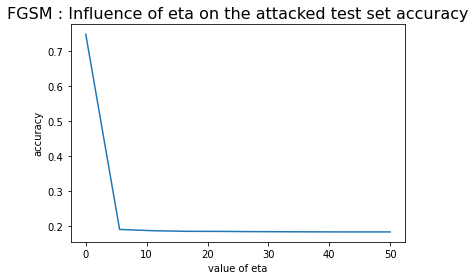

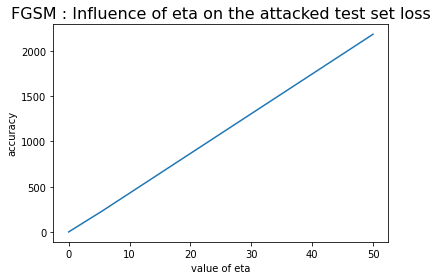

In [222]:
attack = Attack(model)

val_eta = np.linspace(0,50,10)

loss_eta = []
acc_eta = []


for eta in val_eta:
  adv = np.array([attack.fgsm(x_test[i], y_test[i], eta) for i in tqdm.notebook.tqdm(range(len(x_test)))])
  t = model.evaluate(adv,y_test)
  loss_eta.append(t[0])
  acc_eta.append(t[1])


plt.plot(val_eta,acc_eta)
plt.xlabel('value of eta')
plt.ylabel('accuracy')
plt.title('FGSM : Influence of eta on the attacked test set accuracy',fontdict={'fontsize':16})
plt.show()

plt.plot(val_eta,loss_eta)
plt.xlabel('value of eta')
plt.ylabel('accuracy')
plt.title('FGSM : Influence of eta on the attacked test set loss',fontdict={'fontsize':16})
plt.show()

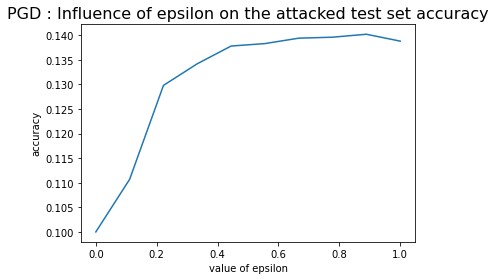

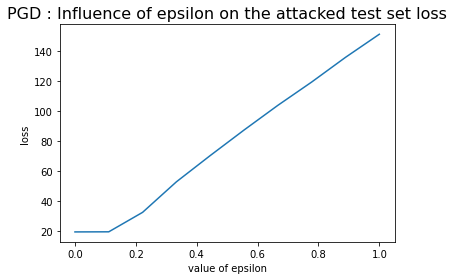

In [227]:
attack = Attack(model)
eta=10
n_iter=3

val_eps = np.linspace(0,1,10)
acc_eps = []
loss_eps = []


for eps in val_eps:
  adv = np.array([attack.pgd(x_test[i],y_test[i],eps,eta,n_iter) for i in tqdm.notebook.tqdm(range(len(x_test)))])
  t = model.evaluate(adv,y_test)
  acc_eps.append(t[1])
  loss_eps.append(t[0])

plt.plot(val_eps,acc_eps)
plt.xlabel('value of epsilon')
plt.ylabel('accuracy')
plt.title('PGD : Influence of epsilon on the attacked test set accuracy',fontdict={'fontsize':16})
plt.show()

plt.plot(val_eps,loss_eps)
plt.xlabel('value of epsilon')
plt.ylabel('loss')
plt.title('PGD : Influence of epsilon on the attacked test set loss',fontdict={'fontsize':16})
plt.show()



In [209]:
attack = Attack(model)

n_iters = [i for i in range(1,11)]
acc_n = []
loss_n = []

for n_iter in n_iters:
  adv = np.array([attack.pgd(x_test[i],y_test[i],1,10,n_iter) for i in tqdm.notebook.tqdm(range(len(x_test)))])
  t = model.evaluate(adv,y_test)
  acc_n.append(t[1])
  loss_n.append(t[0])
#x_test_adv = np.array([np.squeeze(attack.fgsm(x_test[i],y_test[i],eta),axis=0) for i in tqdm.notebook.tqdm(range(len(x_test)))])



313/313 [==============================] - 1s 2ms/step - loss: 52.9353 - accuracy: 0.1718



313/313 [==============================] - 1s 2ms/step - loss: 119.0849 - accuracy: 0.1523



313/313 [==============================] - 1s 2ms/step - loss: 151.2127 - accuracy: 0.1388



313/313 [==============================] - 1s 2ms/step - loss: 167.3820 - accuracy: 0.1337



313/313 [==============================] - 1s 2ms/step - loss: 175.7011 - accuracy: 0.1283



313/313 [==============================] - 1s 2ms/step - loss: 181.9760 - accuracy: 0.1238



313/313 [==============================] - 1s 2ms/step - loss: 185.3045 - accuracy: 0.1193



313/313 [==============================] - 1s 2ms/step - loss: 187.3872 - accuracy: 0.1184



313/313 [==============================] - 1s 2ms/step - loss: 189.6396 - accuracy: 0.1199



313/313 [==============================] - 1s 2ms/step - loss: 190.8189 - accuracy: 0.1159


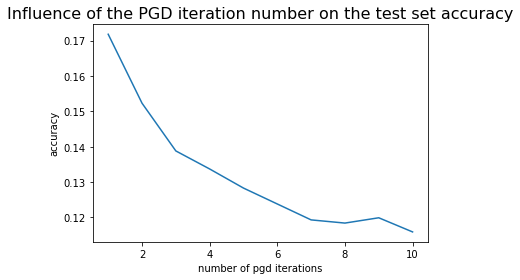

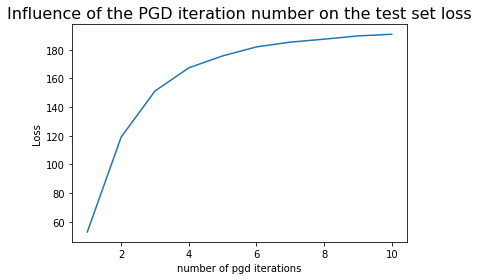

In [219]:
plt.plot(n_iters,acc_n, label = 'test_loss')
plt.xlabel('number of pgd iterations')
plt.ylabel('accuracy')
plt.title('Influence of the PGD iteration number on the test set accuracy',fontdict={'fontsize':16})
plt.show()


plt.plot(n_iters,loss_n, label = 'test_loss')
plt.xlabel('number of pgd iterations')
plt.ylabel('Loss')
plt.title('Influence of the PGD iteration number on the test set loss',fontdict={'fontsize':16})
plt.show()

Text(0, 0.5, 'loss')

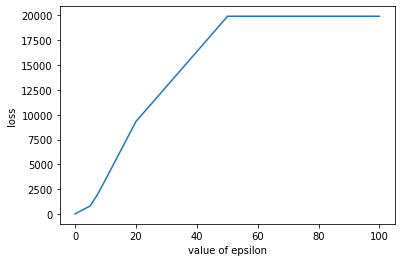

In [194]:
plt.plot(val_eps,loss, label = 'test_loss')
plt.xlabel('value of epsilon')
plt.ylabel('loss')
#plt.legend(loc='lower right')

#test_loss, test_acc = model1.evaluate(x_test,  y_test,verbose=2)

In [168]:
model.evaluate(adv,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 19.6036 - accuracy: 0.1000


[19.603567123413086, 0.10000000149011612]

In [16]:
model.evaluate(x_test_adv,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 429.2327 - accuracy: 0.1882


[429.23272705078125, 0.1881999969482422]

# Defense

#### Creating an adversarial training set

In [17]:
x_train_adv = np.array([np.squeeze(attack.fgsm(x_train[i],y_train[i],eta),axis=0) for i in tqdm.notebook.tqdm(range(len(x_train)))])

In [19]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0745 - accuracy: 0.9751 - val_loss: 1.9338 - val_accuracy: 0.7422
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0771 - accuracy: 0.9745 - val_loss: 2.1310 - val_accuracy: 0.7387
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0717 - accuracy: 0.9768 - val_loss: 2.0796 - val_accuracy: 0.7393
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0652 - accuracy: 0.9782 - val_loss: 2.0989 - val_accuracy: 0.7413
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0715 - accuracy: 0.9776 - val_loss: 2.2196 - val_accuracy: 0.7290
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 2.2351 - val_accuracy: 0.7324
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0807 - accuracy: 0.9748 - val_loss: 2.2319 - val_accuracy:

In [20]:
model.evaluate(x_test_adv,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 625.3278 - accuracy: 0.1902


[625.3278198242188, 0.19020000100135803]

#### Training the previous model on the perturbated dataset

In [0]:
from tensorflow.keras import layers


# Define model
model = tf.keras.models.Sequential(name='cifar')
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
x_adv_train = np.concatenate((x_train,x_train_adv),axis=0)
y_adv_train = np.concatenate((y_train,y_train),axis=0)

Epoch 1/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.5940 - accuracy: 0.4184 - val_loss: 1.3673 - val_accuracy: 0.5066
Epoch 2/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.3016 - accuracy: 0.5321 - val_loss: 1.1709 - val_accuracy: 0.5776
Epoch 3/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.1881 - accuracy: 0.5759 - val_loss: 1.0838 - val_accuracy: 0.6133
Epoch 4/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.1098 - accuracy: 0.6037 - val_loss: 0.9627 - val_accuracy: 0.6658
Epoch 5/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.0451 - accuracy: 0.6268 - val_loss: 0.9409 - val_accuracy: 0.6707
Epoch 6/20
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9912 - accuracy: 0.6474 - val_loss: 0.9488 - val_accuracy: 0.6685
Epoch 7/20
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9440 - accuracy: 0.6634 - val_loss: 0.9429 - val_ac

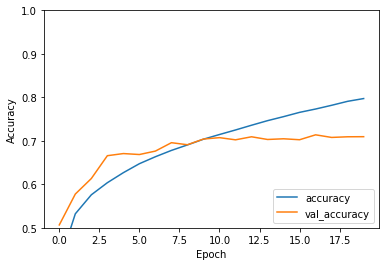

In [34]:
# Compile and fit
model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

history = model.fit(x_adv_train, y_adv_train, epochs=20,
                    validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [36]:
model.evaluate(x_test_adv,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9226 - accuracy: 0.4776


[1.9225674867630005, 0.47760000824928284]

In [0]:
labels[y_test[indice][0]]

'truck'

In [0]:
labels[np.argmax(model(np.expand_dims(x_test[indice],axis = 0)))]

'truck'

In [0]:
LAYER_NAME = 'conv2d_2'

In [0]:
    grad_model = tf.keras.models.Model([model.input], [model.get_layer(name= LAYER_NAME).output,model.output])

    with tf.GradientTape() as g:
        conv_outputs,predictions = grad_model(np.array([img]))
        loss = predictions[:, CAT_CLASS_INDEX]

In [0]:
predictions

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -0.2681559,   9.989664 , -28.27309  , -19.998892 , -37.631615 ,
        -31.672567 , -27.227783 , -29.765774 ,  -1.9302481,  34.395267 ]],
      dtype=float32)>

In [0]:
LAYER_NAME

['conv2d_18',
 'max_pooling2d_12',
 'conv2d_19',
 'max_pooling2d_13',
 'conv2d_20',
 'average_pooling2d_6']

In [0]:
model1.summary()

Model: "model_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 6, 6, 128)         32896     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 5, 256)         13

In [0]:
import cv2
import numpy as np
import tensorflow as tf


img = x_test[0]

num_label = np.argmax(y_test[0])

grad_model = tf.keras.models.Model([model1.input], [model1.get_layer(name= 'conv2d_52').output,model1.output])

with tf.GradientTape() as g:
    conv_outputs,predictions = grad_model(np.array([img]))
    loss = predictions[:, num_label]
    
output = conv_outputs[0]
grads = g.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (32, 32))
cam = np.maximum(cam, 0)

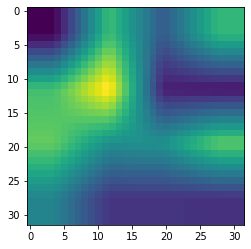

In [0]:
plt.imshow(cam)

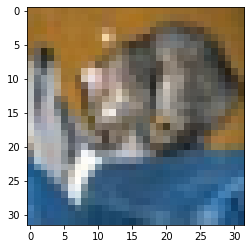

In [0]:
plt.imshow(x_test[0])

In [0]:
grad_model = tf.keras.models.Model([model1.input], [model1.get_layer(name= 'average_pooling2d_6').output,model1.output])

with tf.GradientTape() as g:
    conv_outputs,predictions = grad_model(np.array([img]))
    loss = predictions[:, num_label]
    
    
output = conv_outputs[0]
grads = g.gradient(loss, conv_outputs)[0]



gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (32, 32))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

return output_image
#cv2.imwrite('/content/gdrive/My Drive/Thesis/Data/2019/img.png', output_image)

In [0]:
import cv2
import numpy as np
import tensorflow as tf



def grad_cam(model,image,num_label,layer_name) : 

    LAYER_NAME = layer_name

    img = image

    CAT_CLASS_INDEX = num_label

    grad_model = tf.keras.models.Model([model.input], [model.get_layer(name= LAYER_NAME).output,model.output])

    with tf.GradientTape() as g:
        conv_outputs,predictions = grad_model(np.array([img]))
        loss = predictions[:, num_label]
        
        
    output = conv_outputs[0]
    grads = g.gradient(loss, conv_outputs)[0]



    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.ones(output.shape[0: 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam.numpy(), (32, 32))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

    output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

    return output_image
    #cv2.imwrite('/content/gdrive/My Drive/Thesis/Data/2019/img.png', output_image)

In [0]:
model1.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
average_pooling2d_6 (Average (None, 2, 2, 256)         0  

In [0]:
LAYER_NAME =  ['conv2d_18','max_pooling2d_12' ,'conv2d_19' ,'max_pooling2d_13' ,'conv2d_20' ,'average_pooling2d_6'  ] 
#LAYER_NAME = 'max_pooling2d_13'

i = 91

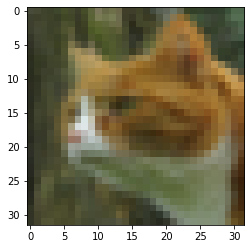

In [0]:
plt.imshow(x_test[i])

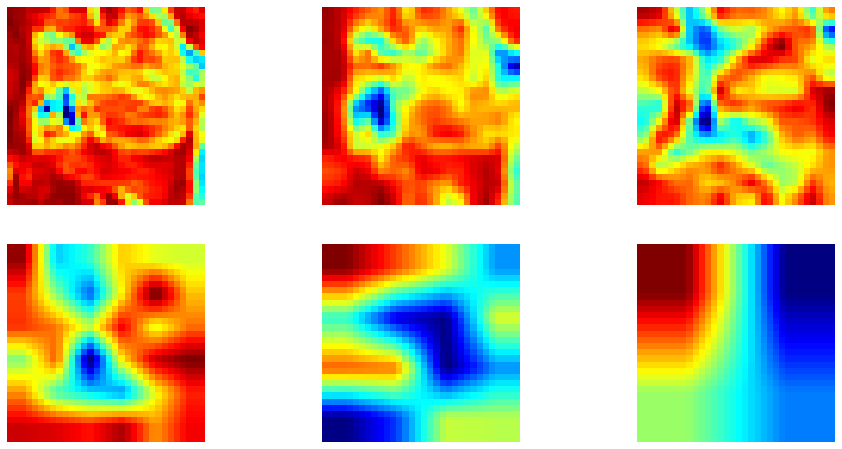

In [0]:
plt.figure(figsize=(16, 8))
for j in range(0, 6):
      plt.subplot(2, 3, j + 1)
      plt.imshow(grad_cam(model1,x_test[i],np.argmax(y_test[i]),LAYER_NAME[j]))
      plt.axis("off")
plt.show()

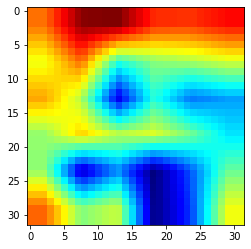

In [0]:
#plt.imshow(x_test[i] + 0.001 * grad_cam(model1,x_test[i],np.argmax(y_test[i]),LAYER_NAME))
plt.imshow(grad_cam(model1,x_test[i],np.argmax(y_test[i]),LAYER_NAME))

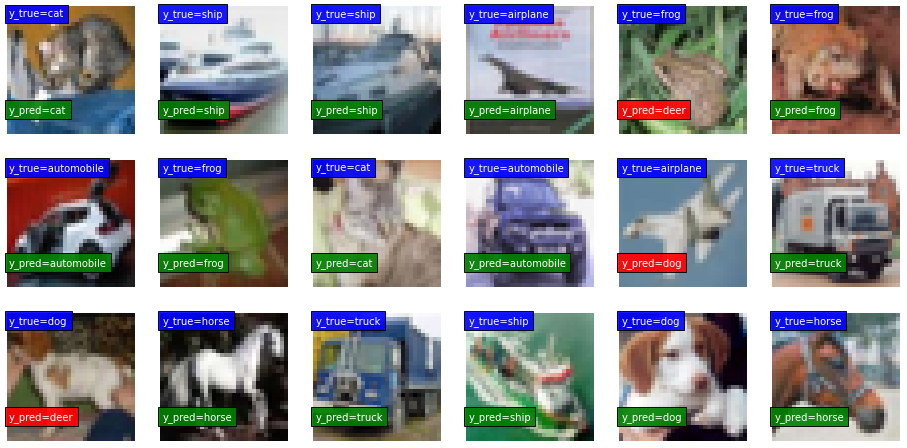

In [0]:
show_prediction(x_test,y_test,model1)

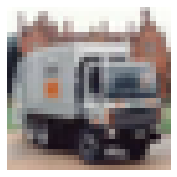

In [0]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis("off")
plt.show()

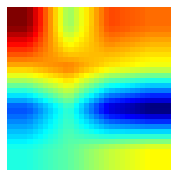

In [0]:
plt.figure(figsize=(3,3))
plt.imshow(output_image)
plt.axis("off")
plt.show()

In [0]:
argmaxmodel.predict(np.expand_dims(x_test[indice],axis = 0))

array([[  4.192574 ,   0.7515211,  -6.700806 ,  -7.0770035,  -5.0727797,
         -9.84957  , -12.273605 ,  -4.151551 ,   1.6823169,   3.8484962]],
      dtype=float32)

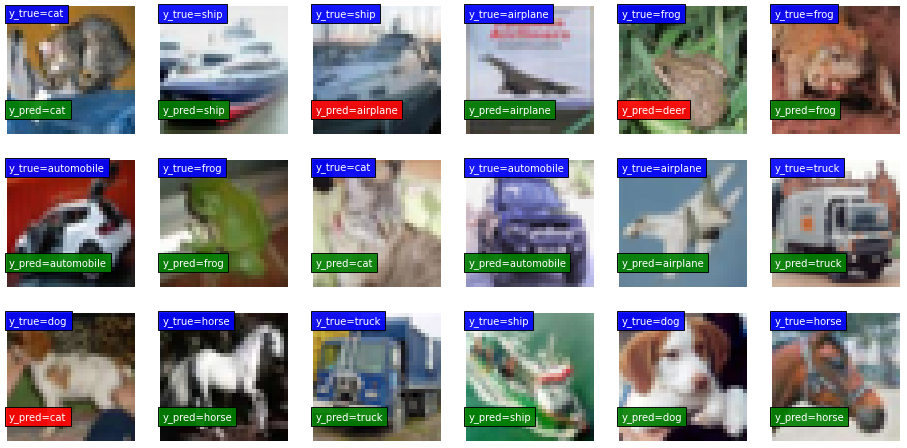

In [0]:
show_prediction(x_test,y_test,model)

In [0]:
input_shape = x_train[0].shape

In [0]:
base_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape)
base_model.trainable = False # True

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
new_model.summary()

In [0]:
base_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape)
base_model.trainable = False # True


output = tf.keras.layers.Flatten()(base_model.output)
output = tf.keras.layers.Dense(units = 128, activation='relu',)(output)
output = tf.keras.layers.Dense(units = 10)(output)
new_model = tf.keras.Model(base_model.input, output)


loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

new_model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

history = new_model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4126 - accuracy: 0.5022 - val_loss: 1.2806 - val_accuracy: 0.5472
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2409 - accuracy: 0.5638 - val_loss: 1.2532 - val_accuracy: 0.5630
Epoch 3/20
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1878 - accuracy: 0.5830 - val_loss: 1.2074 - val_accuracy: 0.5749
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1474 - accuracy: 0.5965 - val_loss: 1.1945 - val_accuracy: 0.5775
Epoch 5/20
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1150 - accuracy: 0.6088 - val_loss: 1.1804 - val_accuracy: 0.5866
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0889 - accuracy: 0.6174 - val_loss: 1.1883 - val_accuracy: 0.5844
Epoch 7/20
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0642 - accuracy: 0.6261 - val_loss: 1.1763 -

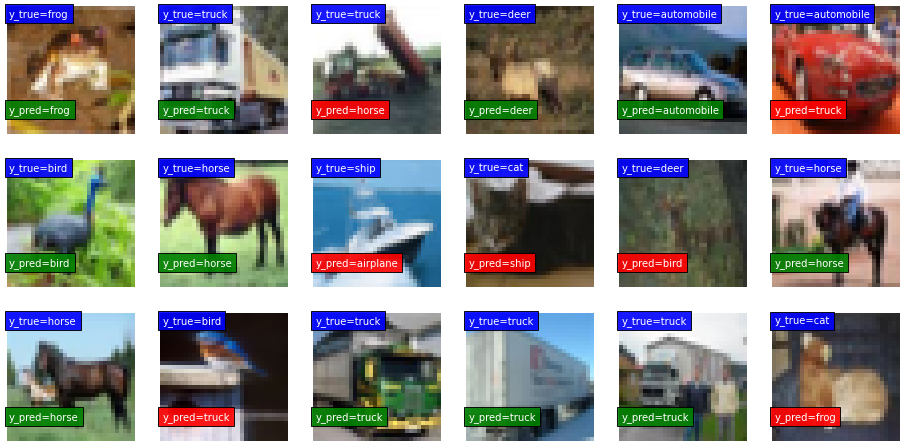

In [0]:
show_prediction(x_train,y_train,new_model)

In [0]:
h = new_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


ValueError: ignored

In [0]:
x_test